In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [229]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [230]:
bus = pd.read_excel('./data/버스확인(최종).xlsx')
bus

,버스 번호,시내 버스,저상버스
0,33,26,8
1,33-1,16,5
2,133,24,4
3,123,23,2
4,126,33,8
...,...,...,...
143,210,15,0
144,148-1,14,12
145,NaN,NaN,NaN
146,총 합계,"2,524",730


In [231]:
pd.options.display.float_format = '{:,.0f}'.format
bus

,버스 번호,시내 버스,저상버스
0,33,26,8
1,33-1,16,5
2,133,24,4
3,123,23,2
4,126,33,8
...,...,...,...
143,210,15,0
144,148-1,14,12
145,NaN,NaN,NaN
146,총 합계,"2,524",730


In [232]:
total = bus.loc[[147]]
total

,버스 번호,시내 버스,저상버스
147,203 제외,"2,517",730


In [233]:
total = total.transpose()
total

,147
버스 번호,203 제외
시내 버스,"2,517"
저상버스,730


In [234]:
total = total.drop(['버스 번호'], axis=0)
total

,147
시내 버스,"2,517"
저상버스,730


In [235]:
total = total.rename(columns={147 : '전체대수'})
total

,전체대수
시내 버스,"2,517"
저상버스,730


In [236]:
pd.options.display.float_format = '{:,.0f}'.format
bus

,버스 번호,시내 버스,저상버스
0,33,26,8
1,33-1,16,5
2,133,24,4
3,123,23,2
4,126,33,8
...,...,...,...
143,210,15,0
144,148-1,14,12
145,NaN,NaN,NaN
146,총 합계,"2,524",730


# 1번 노선

In [237]:
bus1 = bus.loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
bus1

,버스 번호,시내 버스,저상버스
0,33,26,8
1,33-1,16,5
2,133,24,4
3,123,23,2
4,126,33,8
5,160,17,0
6,169,30,14
7,169-1,24,0
8,15,38,7
9,59,15,6


In [261]:
bus1_total = pd.DataFrame({'전체대수':[192, 54]}, index=['시내버스', '저상버스'])
bus1_total

,전체대수
시내버스,192
저상버스,54


# 2번 노선

In [239]:
bus2 = bus.loc[[0, 2, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]]
bus2

,버스 번호,시내 버스,저상버스
0,33,26,8
2,133,24,4
5,160,17,0
6,169,30,14
7,169-1,24,0
9,59,15,6
10,31,37,12
11,68,35,13
12,168,18,9
13,108,20,12


In [240]:
bus2.loc[21] = ['합계', 383, 129]
bus2

,버스 번호,시내 버스,저상버스
0,33,26,8
2,133,24,4
5,160,17,0
6,169,30,14
7,169-1,24,0
9,59,15,6
10,31,37,12
11,68,35,13
12,168,18,9
13,108,20,12


In [263]:
bus2_total = pd.DataFrame({'전체대수':[254, 129]}, index=['시내버스', '저상버스'])
bus2_total

,전체대수
시내버스,254
저상버스,129


# 3번 노선

In [242]:
bus3 = bus.loc[[3, 4, 11, 12, 15, 16, 17, 19, 22, 24]]
bus3

,버스 번호,시내 버스,저상버스
3,123,23,2
4,126,33,8
11,68,35,13
12,168,18,9
15,138,25,12
16,138-1,19,5
17,61,23,0
19,16,30,0
22,338,20,0
24,1005,7,0


In [264]:
bus3_total = pd.DataFrame({'전체대수':[208, 49]}, index=['시내버스', '저상버스'])
bus3_total

,전체대수
시내버스,208
저상버스,49


# 4번 노선

In [244]:
bus4 = bus.loc[[10, 23]]
bus4

,버스 번호,시내 버스,저상버스
10,31,37,12
23,307,14,0


In [265]:
bus4_total = pd.DataFrame({'전체대수':[39, 12]}, index=['시내버스', '저상버스'])
bus4_total

,전체대수
시내버스,39
저상버스,12


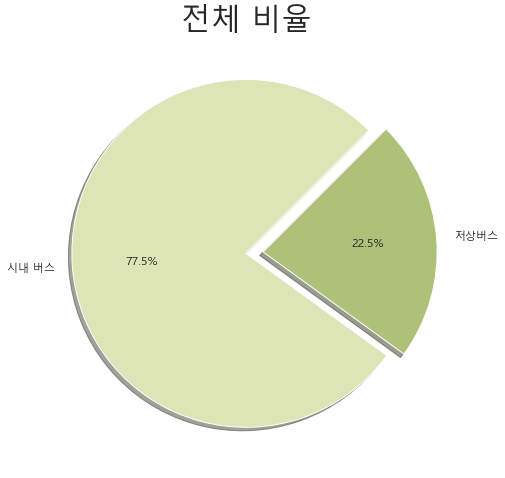

In [320]:
plt.figure(figsize=(15,8))
size = total['전체대수']
labels = total['전체대수'].index
colors = ['#dde5b6', '#adc178']
explode = [0,0.1]

plt.pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
plt.title('전체 비율',fontsize=30)
plt.show()

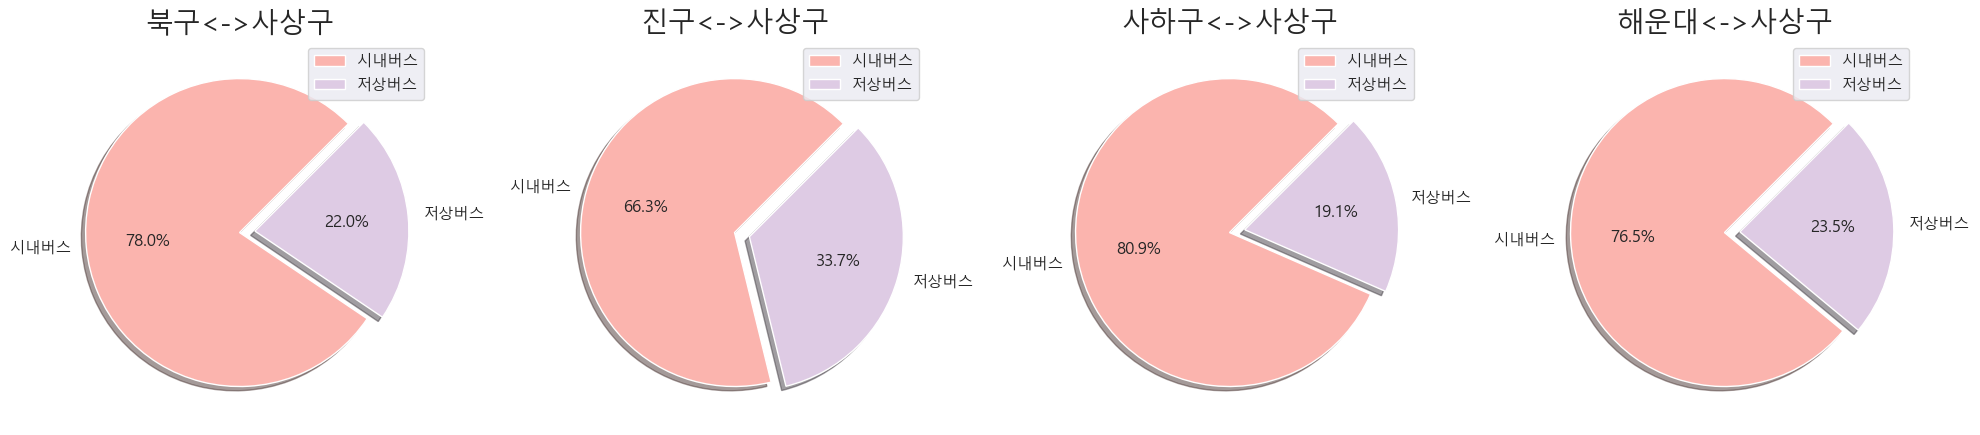

In [271]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8), dpi=100, facecolor='white')

size = bus1_total['전체대수']
labels = bus1_total['전체대수'].index
colors = plt.cm.Pastel1(np.linspace(0, 1, 4))
explode=[0, 0.1]

ax[0].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[0].set_title('북구<->사상구',fontsize=20)
ax[0].legend()

size = bus2_total['전체대수']
labels = bus2_total['전체대수'].index
colors = plt.cm.Pastel1(np.linspace(0, 1, 4))
explode=[0, 0.1]

ax[1].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[1].set_title('진구<->사상구',fontsize=20)
ax[1].legend()

size = bus3_total['전체대수']
labels = bus3_total['전체대수'].index
colors = plt.cm.Pastel1(np.linspace(0, 1, 4))
explode=[0, 0.1]

ax[2].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[2].set_title('사하구<->사상구',fontsize=20)
ax[2].legend()

size = bus4_total['전체대수']
labels = bus4_total['전체대수'].index
colors = plt.cm.Pastel1(np.linspace(0, 1, 4))
explode=[0, 0.1]

ax[3].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[3].set_title('해운대<->사상구',fontsize=20)
ax[3].legend()


plt.tight_layout()
plt.show()

In [269]:
bus_not = pd.DataFrame({'전체대수':[1350, 579]}, index=['시내버스', '저상버스'])
bus_not

,전체대수
시내버스,1350
저상버스,579


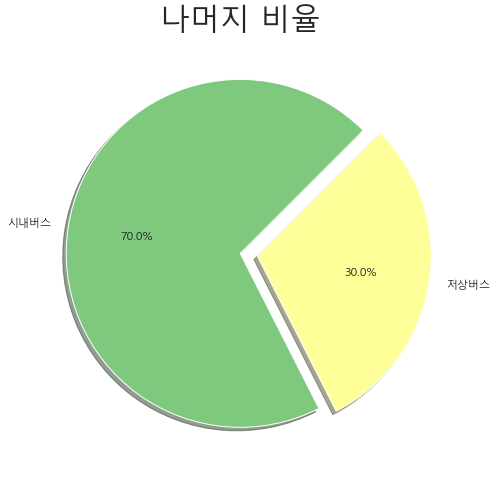

In [279]:
plt.figure(figsize=(15,8))
size = bus_not['전체대수']
labels = bus_not['전체대수'].index
colors = plt.cm.Accent(np.linspace(0, 2, 6))
explode = [0,0.1]

plt.pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
plt.title('나머지 비율',fontsize=30)
plt.show()

In [322]:
people = pd.DataFrame({'인구수':[3155814, 175630]}, index=['비장애인수', '장애인수'])
people

,인구수
비장애인수,3155814
장애인수,175630


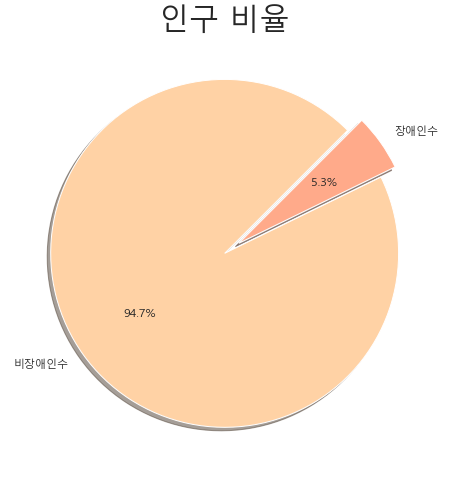

In [331]:
plt.figure(figsize=(15,8))
size = people['인구수']
labels = people['인구수'].index
colors = ['#FFD2A5', '#FFAA8A']
explode = [0,0.1]

plt.pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
plt.title('인구 비율',fontsize=30)
plt.show()